In [47]:
# Numy, the engine of scientific computing in Python
import numpy as np

# We'll demo a bit of Scipy
import scipy.special

In [2]:
np.array()

TypeError: Required argument 'object' (pos 1) not found

In [3]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [12]:
my_arr = np.array([1,2,3,4])

In [7]:
my_arr

array([1, 2, 3, 4])

In [8]:
my_arr.dtype

dtype('int64')

In [13]:
my_arr.shape

(4,)

In [15]:
my_arr.astype(float)

array([1., 2., 3., 4.])

In [16]:
my_arr.mean()

2.5

In [17]:
my_arr.std()

1.118033988749895

In [18]:
np.sum(my_arr)

10

In [22]:
n = 10

np.zeros(n).astype(list)

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [23]:
n = 10

np.zeros(n)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
my_arr = np.ones(n)

my_arr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
my_arr * 5

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [28]:
my_fives = my_arr * 5

In [29]:
my_fives

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [30]:
#gives you an array of the same shape as the input array
np.zeros_like(my_fives)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
my_arr = np.array([1, 2, 3, 4, 5])

np.exp(my_arr)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [37]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use ``linspace`` for these cases.

Parameters
----------
start : number, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : number
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : number, optional
    Spacing between values.  For any output `out`, this is the distan

In [39]:
my_arr = np.arange(5)
my_arr

array([0, 1, 2, 3, 4])

In [52]:
my_arr = np.arange(1, 6)
my_arr

array([1, 2, 3, 4, 5])

In [43]:
np.dot(my_arr)

TypeError: Required argument 'b' (pos 2) not found

In [44]:
np.dot(my_arr, my_arr)

55

In [45]:
np.pi

3.141592653589793

In [53]:
# We'll demo a bit of Scipy, sometimes needs to import specific submodules 
#if we import scipy, it won't import special
#importing scipy.special won't import all of scipy
import scipy.special

In [55]:
#error function - cumulative 
#The error function is related to the cumulative distribution {\displaystyle \Phi } \Phi , the integral of the standard normal distribution
scipy.special.erf(my_arr)

array([0.84270079, 0.99532227, 0.99997791, 0.99999998, 1.        ])

In [56]:
# good stats program, has t tests, pearsons, anova?
import scipy.stats
    #this also works by taking in panda dfs, don't need to first put them into a np array

In [57]:
my_slow_arr = [0, 1, 2, 3, 4]

for value in my_slow_arr:
    print(value * 2)

0
2
4
6
8


In [59]:
my_fast_arr = np.array([0, 1, 2, 3, 4])
my_fast_arr * 2

array([0, 2, 4, 6, 8])

In [61]:
def multiply_python(arr):
    """Multiplies the array by two"""
    new_arr = np.zeros_like(arr)
    for i, value in enumerate(arr):
        new_arr[i] = value * 2
    return new_arr

In [62]:
my_arr = np.arange(1000)

In [63]:
%timeit multiply_python(my_arr)

310 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
new_np_array = np.arange(1000)

In [65]:
%timeit new_np_array * 2

1.18 µs ± 2.08 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Clearly, using numpy's higher level language works much, MUCH faster than python's lower level coding

This is because these big packages (numpy, scipy, pandas) are written in a compiled language like C, rather than an interpretive language like Python, so you're using Python interpretive language to interact with the compiled language packages, and it can then just work much faster

Lesson 27

In [66]:
import numpy as np
import pandas as pd

import bootcamp_utils
import altair as alt

In [67]:
df = pd.read_csv('data/c_elegans_egg_xa.csv', comment='#')

In [68]:
df.head()

,food,area (sq um)
0,high,2061
1,high,1792
2,high,1852
3,high,2091
4,high,1781


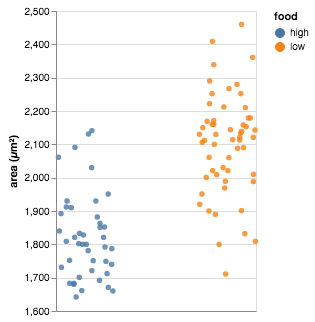

In [79]:
bootcamp_utils.altair_jitter(df,
                             encode_x=alt.X('food:N'), 
                             encode_y=alt.Y('area (sq um):Q',
                                            title='area (µm²)', 
                                            scale=alt.Scale(zero=False)),
                             height=300,
                             width=200
                            ).configure_point(filled=True, opacity=0.8)

In [82]:
xa_high = df.loc[df['food'] == 'high', 'area (sq um)']

xa_high.head()

0    2061
1    1792
2    1852
3    2091
4    1781
Name: area (sq um), dtype: int64

In [83]:
type(xa_high)

pandas.core.series.Series

In [84]:
xa_high_np = xa_high.values

type(xa_high_np)

numpy.ndarray

In [85]:
xa_high_np

array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
       1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
       1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
       1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828])

In [87]:
xa_low = df.loc[df['food'] == 'low', 'area (sq um)'].values
xa_low

array([2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280, 1809,
       2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460, 2021,
       2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021, 1969,
       2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061, 2121,
       1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121,
       2409])

In [88]:
xa_high = xa_high_np
xa_high, xa_low

(array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
        1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
        1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
        1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828]),
 array([2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280, 1809,
        2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460, 2021,
        2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021, 1969,
        2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061, 2121,
        1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121,
        2409]))

In [89]:
#maybe we want to divide square um to make it square mm
xa_high / 1e6

array([0.002061, 0.001792, 0.001852, 0.002091, 0.001781, 0.001912,
       0.001802, 0.001751, 0.001731, 0.001892, 0.001951, 0.001809,
       0.001683, 0.001787, 0.00184 , 0.001821, 0.00191 , 0.00193 ,
       0.0018  , 0.001833, 0.001683, 0.001671, 0.00168 , 0.001692,
       0.0018  , 0.001821, 0.001882, 0.001642, 0.001749, 0.001712,
       0.001661, 0.001701, 0.002141, 0.001863, 0.001752, 0.00174 ,
       0.001721, 0.00166 , 0.00193 , 0.00203 , 0.001851, 0.002131,
       0.001828])

In [90]:
xa_high < 2000

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True])

In [91]:
xa_high

array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
       1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
       1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
       1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828])

In [92]:
if xa_high > 2000:
    print('This is a test')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [95]:
(xa_high > 2000).any()

True

In [96]:
(xa_high > 2000).all()

False

In [115]:
(np.isclose(xa_high, 2000)).any()

False

In [103]:
np.isclose(1.3, 1.29999)

True

In [104]:
np.isclose(xa_high, 1800)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [105]:
xa_high == 1800

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [106]:
np.allclose(xa_high, 1800)

False

In [109]:
xa_high + xa_low

ValueError: operands could not be broadcast together with shapes (43,) (56,) 

In [112]:
xa_low_slice = xa_low[:len(xa_high)]
xa_low_slice.shape

(43,)

In [111]:
xa_high + xa_low_slice

array([4151, 3961, 3840, 4303, 4120, 3901, 3946, 4041, 3651, 4172, 3760,
       3967, 3483, 3920, 3900, 3981, 3911, 3960, 3888, 3784, 4143, 3692,
       3690, 3831, 3960, 3927, 4053, 3755, 3928, 3602, 3840, 3722, 4110,
       4013, 3652, 4007, 3432, 3561, 4044, 4142, 4212, 4261, 3889])

In [116]:
np.isclose(xa_high, xa_low_slice)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [117]:
xa_high[::-1]

array([1828, 2131, 1851, 2030, 1930, 1660, 1721, 1740, 1752, 1863, 2141,
       1701, 1661, 1712, 1749, 1642, 1882, 1821, 1800, 1692, 1680, 1671,
       1683, 1833, 1800, 1930, 1910, 1821, 1840, 1787, 1683, 1809, 1951,
       1892, 1731, 1751, 1802, 1912, 1781, 2091, 1852, 1792, 2061])

In [118]:
xa_high

array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
       1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
       1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
       1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828])

In [120]:
# every third element
xa_high[::3]

array([2061, 2091, 1802, 1892, 1683, 1821, 1800, 1671, 1800, 1642, 1661,
       1863, 1721, 2030, 1828])

In [121]:
xa_high > 2000

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False,  True, False])

In [122]:
xa_high[xa_high > 2000]

array([2061, 2091, 2141, 2030, 2131])

In [123]:
np.where(xa_high > 2000)

(array([ 0,  3, 32, 39, 41]),)

In [125]:
# np arrays are mutable, like python lists
my_ar = np.array([1,2,3,4])
my_ar

array([1, 2, 3, 4])

In [127]:
my_ar[2] = 6
my_ar

array([1, 2, 6, 4])

In [131]:
my_ar2 = my_ar

my_ar2[3] = 9

my_ar
my_ar2

array([1, 2, 6, 9])

In [133]:
my_ar2 = my_ar.copy()

my_ar2[3] = 10

my_ar, my_ar2

(array([1, 2, 6, 9]), array([ 1,  2,  6, 10]))

In [134]:
#our arrays are currently 1D objects, but let's make them 2D
xa_high.reshape((11, 4))

ValueError: cannot reshape array of size 43 into shape (11,4)

In [135]:
#problem because we have 44 elements, but we want to make it into a 44 array

In [136]:
xa_low.reshape(7,8)

array([[2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290],
       [1920, 2280, 1809, 2158, 1800, 2133, 2060, 2160],
       [2001, 2030, 2088, 1951, 2460, 2021, 2010, 2139],
       [2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021],
       [1969, 2150, 1900, 2267, 1711, 1901, 2114, 2112],
       [2361, 2130, 2061, 2121, 1832, 2210, 2130, 2153],
       [2009, 2100, 2252, 2143, 2252, 2222, 2121, 2409]])

In [137]:
xa_low

array([2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280, 1809,
       2158, 1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460, 2021,
       2010, 2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021, 1969,
       2150, 1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061, 2121,
       1832, 2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121,
       2409])

In [138]:
xa_low_2d = xa_low.reshape(7,8)

In [139]:
xa_low_2d[3, 1]

2106

In [140]:
xa_low_2d

array([[2090, 2169, 1988, 2212, 2339, 1989, 2144, 2290],
       [1920, 2280, 1809, 2158, 1800, 2133, 2060, 2160],
       [2001, 2030, 2088, 1951, 2460, 2021, 2010, 2139],
       [2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021],
       [1969, 2150, 1900, 2267, 1711, 1901, 2114, 2112],
       [2361, 2130, 2061, 2121, 1832, 2210, 2130, 2153],
       [2009, 2100, 2252, 2143, 2252, 2222, 2121, 2409]])

In [141]:
xa_low_2d[xa_low_2d > 2000]

array([2090, 2169, 2212, 2339, 2144, 2290, 2280, 2158, 2133, 2060, 2160,
       2001, 2030, 2088, 2460, 2021, 2010, 2139, 2160, 2106, 2171, 2113,
       2179, 2179, 2021, 2150, 2267, 2114, 2112, 2361, 2130, 2061, 2121,
       2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121, 2409])

In [142]:
np.where(xa_low_2d > 2000)

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([0, 1, 3, 4, 6, 7, 1, 3, 5, 6, 7, 0, 1, 2, 4, 5, 6, 7, 0, 1, 2, 3,
        4, 6, 7, 1, 3, 6, 7, 0, 1, 2, 3, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]))

In [145]:
ar_combined = np.concatenate([xa_high, xa_low])
ar_combined

array([2061, 1792, 1852, 2091, 1781, 1912, 1802, 1751, 1731, 1892, 1951,
       1809, 1683, 1787, 1840, 1821, 1910, 1930, 1800, 1833, 1683, 1671,
       1680, 1692, 1800, 1821, 1882, 1642, 1749, 1712, 1661, 1701, 2141,
       1863, 1752, 1740, 1721, 1660, 1930, 2030, 1851, 2131, 1828, 2090,
       2169, 1988, 2212, 2339, 1989, 2144, 2290, 1920, 2280, 1809, 2158,
       1800, 2133, 2060, 2160, 2001, 2030, 2088, 1951, 2460, 2021, 2010,
       2139, 2160, 2106, 2171, 2113, 2179, 1890, 2179, 2021, 1969, 2150,
       1900, 2267, 1711, 1901, 2114, 2112, 2361, 2130, 2061, 2121, 1832,
       2210, 2130, 2153, 2009, 2100, 2252, 2143, 2252, 2222, 2121, 2409])

In [ ]:
test